<a href="https://colab.research.google.com/github/shanthivijayan/Capstone-Project/blob/main/HTTP_and_Requests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> HTTP and Requests</h1>

## Overview of HTTP

When you, the **client**, use a web page your browser sends an **HTTP** request to the **server** where the page is hosted. The server tries to find the desired **resource** by default "<code>index.html</code>". If your request is successful, the server will send the object to the client in an **HTTP response**. This includes information like the type of the **resource**, the length of the **resource**, and other information.

<p>
The figure below represents the process. The circle on the left represents the client, the circle on the right represents the Web server. The table under the Web server represents a list of resources stored in the web server. In  this case an <code>HTML</code> file, <code>png</code> image, and <code>txt</code> file .
</p>
<p>
The <b>HTTP</b> protocol allows you to send and receive information through the web including webpages, images, and other web resources. In this lab, we will provide an overview of the Requests library for interacting with the <code>HTTP</code> protocol.
</p

<div class="alert alert-block alert-info" style="margin-top: 20px">
         <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/reqest_basics.png" width="750" align="center">

</div>


## Uniform Resource Locator:URL
Uniform resource locator (URL) is the most popular way to find resources on the web.  We can break the URL into three parts.

<ul>
    <li><b>Scheme</b>:- This is this protocol, for this lab it will always be <code>http://</code>  </li>
    <li><b> Internet address or  Base URL </b>:- This will be used to find the location here are some examples: <code>www.ibm.com</code> and  <code> www.gitlab.com </code> </li>
    <li><b>Route</b>:- Location on the web server for example: <code>/images/IDSNlogo.png</code> </li>
</ul>


You may also hear the term Uniform Resource Identifier (URI), URL are actually a subset of URIs. Another popular term is endpoint, this is the URL of an operation provided by a Web server.


## Request
The process can be broken into the <b>Request</b> and <b>Response </b> process.  The request using the get method is partially illustrated below. In the start line we have the <code>GET</code> method, this is an <code>HTTP</code> method. Also the location of the resource  <code>/index.html</code> and the <code>HTTP</code> version. The Request header passes additional information with an <code>HTTP</code> request:
<div class="alert alert-block alert-info" style="margin-top: 20px">
         <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/reqest_messege.png" width="400" align="center">
</div>


When an <code>HTTP</code> request is made, an <code>HTTP</code> method is sent, this tells the server what action to perform.  A list of several <code>HTTP</code> methods is shown below. We will go over more examples later.
<div class="alert alert-block alert-info" style="margin-top: 20px">
         <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/http_methods.png" width="400" align="center">
</div>


## Response
The figure below represents the response; the response start line contains the version number <code>HTTP/1.0</code>, a status code (200) meaning success, followed by a descriptive phrase (OK). The response header contains useful information. Finally, we have the response body containing the requested file, an <code> HTML </code> document.  It should be noted that some requests have headers.
<div class="alert alert-block alert-info" style="margin-top: 20px">
         <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/response_message.png" width="400" align="center">
</div>


Some status code examples are shown in the table below, the prefix indicates the class. These are shown in yellow, with actual status codes shown in  white. Check out the following <a href="https://developer.mozilla.org/en-US/docs/Web/HTTP/Status?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01">link </a> for more descriptions.

<div class="alert alert-block alert-info" style="margin-top: 20px">
         <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/status_code.png" width="300" align="center">
</div>


## Requests in Python
Requests is a Python Library that allows you to send <code>HTTP/1.1</code> requests easily. We can import the library as follows:

In [1]:
import requests

In [2]:
import os
from PIL import Image
from IPython.display import IFrame

In [16]:

url='https://www.ibm.com/'
r=requests.get(url)


We have the response object <code>r</code>, this has information about the request, like the status of the request. We can view the status code using the attribute <code>status_code</code>.

In [4]:
r.status_code

200

In [5]:
print(r.request.headers)

{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Cookie': '_abck=C7E022FEFACAD07F256CE7D8FE3A8DCF~-1~YAAQC6vbFzK8xoCOAQAAdW1zjAs5IVyXw+7fwgrLYgHhoI4pTW19s3I6MEblp5+q0A53q4ju9S7iU6q6rhim03RV8fsuPm/9JnIkxguaMUMlSrX2zg0ZYYYBCwe01s9EuCBn/f7aoWW6Tp2yyxkD04nmZHaQqJiKVzmiqdaUjnqbQfkzZTZuqbFdGNshF1rN3Rn7dvPhuK2c2TQJvDyFC/4IDccz+P8bwrJPl9VRBf/E4OUSzwXEulA2c1BrbEpJKdCAzuC10fGqiIaK7E7IQUUlqTGo9IKhI6qQBucoeRft0PlD374VlKqlzY8LafntU0ifARuF04dJznmTwp+dgIURC1r5U65u6g9AkWwR/rNT6pLvumU=~-1~-1~-1; bm_sz=0B0AC56F1E6898275D1DC52BD13917DC~YAAQC6vbFzO8xoCOAQAAdW1zjBfu2jSHl3X/iS62piPFT3XLjA8jolOovP+0odEbtPzZKqKconP4P2FQiXm0pG6MNr/H8NyfoxzB4Ne8UNyc4qPhEoJobYpqGpOkvGWOwIRo5M3rZkpLxHvsy1tgPaNO5I7OG8SlXj8HeSIAeDAEDHAumoHYLE3pLbp3ci4mdRUVsThandAPDxXSZ0d2kF4oL8hEKGzIFulrZV3OYr522Ibtm6X+8yOxp2BVtq0q5YAbYZJ3h6PtY6VuTWHg2fBzMeM4ssW4nZbBW8OBSgruwDk+UukAlArVOCpJLSqLOLBQwrNA1IKXjOAUVafrljkZzC0q91kFUk8X~3291459~4408368'}


You can view the request body, in the following line, as there is no body for a get request we get a <code>None</code>:

In [6]:
print("request body:", r.request.body)

request body: None


You can view the <code>HTTP</code> response header using the attribute <code>headers</code>. This returns a python dictionary of <code>HTTP</code> response headers.


In [7]:
header=r.headers
print(r.headers)

{'Content-Type': 'text/html;charset=utf-8', 'X-Dispatcher': 'prod-publish-1', 'X-Vhost': 'publish', 'X-Content-Type-Options': 'nosniff', 'Last-Modified': 'Fri, 29 Mar 2024 05:01:14 GMT', 'X-Frame-Options': 'SAMEORIGIN', 'CF-Cache-Status': 'DYNAMIC', 'Server': 'cloudflare', 'CF-RAY': '86bd4d041e4b07f0-IAD', 'Cache-Control': 'max-age=793', 'Expires': 'Fri, 29 Mar 2024 23:15:51 GMT', 'X-Akamai-Transformed': '9 12218 0 pmb=mTOE,2', 'Content-Encoding': 'gzip', 'Date': 'Fri, 29 Mar 2024 23:02:38 GMT', 'Content-Length': '12488', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Strict-Transport-Security': 'max-age=31536000'}


In [8]:
header['date']

'Fri, 29 Mar 2024 23:02:38 GMT'

In [9]:
header['Content-Type']#Content-Type indicates the type of data:

'text/html;charset=utf-8'

In [17]:
r.encoding

'utf-8'

As the <code>Content-Type</code> is <code>text/html</code> we can use the attribute <code>text</code> to display the <code>HTML</code> in the body. We can review the first 100 characters:


In [18]:
r.text[0:100]

'\n<!DOCTYPE HTML>\n<html lang="en-us">\n<head>\n    \n    \n    \n    \n    <meta charset="UTF-8"/>\n    <met'

You can load other types of data for non-text requests, like images. Consider the URL of the following image:


In [19]:
# Use single quotation marks for defining string
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png'

In [20]:
r=requests.get(url)
r.status_code

200

In [25]:
print(r.headers)#response header

{'Date': 'Fri, 29 Mar 2024 23:19:00 GMT', 'X-Clv-Request-Id': 'ce5486af-7a60-4a21-bceb-e4fb59a1c3fe', 'Server': 'Cleversafe', 'X-Clv-S3-Version': '2.5', 'Accept-Ranges': 'bytes', 'x-amz-request-id': 'ce5486af-7a60-4a21-bceb-e4fb59a1c3fe', 'ETag': '"8bb44578fff8fdcc3d2972be9ece0164"', 'Content-Type': 'image/png', 'Last-Modified': 'Wed, 16 Nov 2022 03:32:41 GMT', 'Content-Length': '78776'}


In [26]:
r.request.headers#request header

{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [29]:
print(r.request.body)

None


In [32]:
print(r.headers['content-type'])

image/png


An image is a response object that contains the image as a <a href="https://docs.python.org/3/glossary.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01#term-bytes-like-object">bytes-like object</a>. As a result, we must save it using a file object. First, we specify the <u>file path and
name</u>

In [33]:
path=os.path.join(os.getcwd(),'image.png')

We save the file, in order to access the body of the response we use the attribute <code>content</code> then save it using the <code>open</code> function and write <code>method</code>:

In [34]:
with open(path,'wb') as f:
    f.write(r.content)

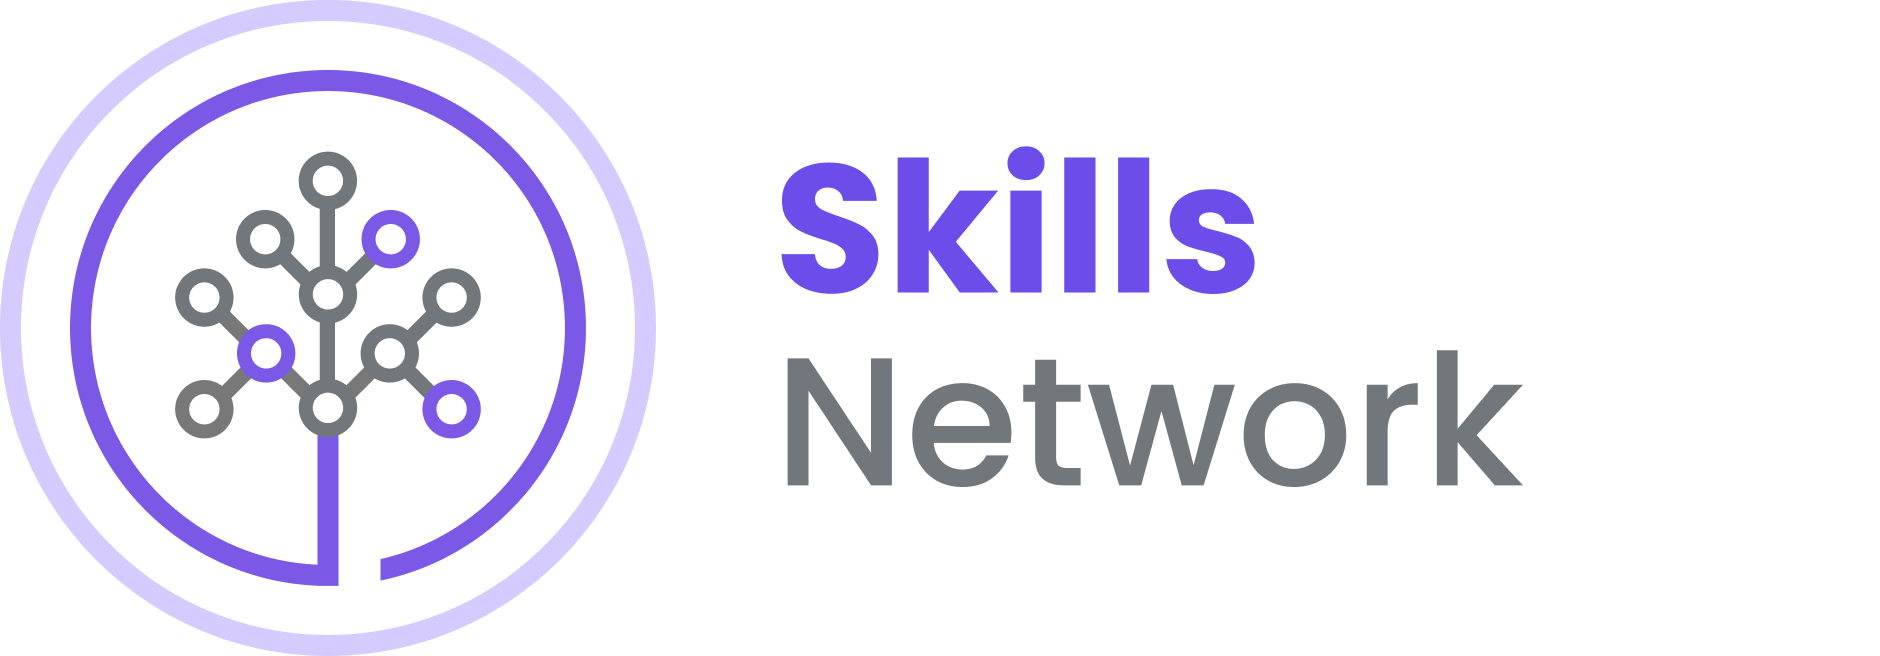

In [35]:
Image.open(path)

<h3>Question: Download a file </h3>

In [37]:
url1='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/Example1.txt'
r1=requests.get(url1)
r1.status_code
r.content

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x07X\x00\x00\x02\x90\x08\x06\x00\x00\x002\x8a\xa8G\x00\x00\x00\tpHYs\x00\x00\x16%\x00\x00\x16%\x01IR$\xf0\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x013MIDATx\x01\xec\xfd_p\\\xf5\x9d\xef\xfd~\xbfk\xb5$\x13\'\x13\xb9j\x07\xf0\x19\x18Z\xfbb\xea1\t\x0f\xd2\x14f\xcf\xd4\xa9zh\xe5r\n\x83\x9c\xaaI\x9c\\\x1c\xcb\xb9J\x81g\xbbmN\xd0\x19\xcb\x13\xb7\xb3\x913b*\xb8]\xdbP\xb99\xb1\xbc/&\x9eL\x15\x16\xe0\xd9\xe7\x9c\x9b\xb8\xb98\xc5\xf3\xe0T$\x12\x02w\xa3f`\xe2`\xf6\x14\xca\xb3\x03\xb1\xdd\xbd\xd6\xef\xf9\xfdZ\x92\xb1\xc1\x7f\xa4\xee\xf5\xeb^\xbd\xd6\xfbE\xb5%\x1b\xdb\x92\xfb\xcfZ\xab\x7f\x9f\xdf\xf7\xfbU\x01\x80>\xb4\xb0`\x8a\xeec\xa1)\xc5Pe8\x8ee8\x10\xf9\xa21\xb2\xa5\xf5\x1bB\xb9\xcf}P\xfb\xebb\xff\xff\xea\x1f\x1b^\xbd]e\xec\xcf\xf5S\xbfv;\xf6\xcf,\xdb?\xb3\xfc\xa9_\xae_\xf3\x1b\x96M\xb0\xfa\xff#y\xa7\xf5}\xa8|\x18\x8b\xfc\xce\xe8\xca\xefS\xfb{\x1a\x03\xb2<6\xa6u\x01\x00\x00\x00\x00\x00\x00\x00\x00}

In [38]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/Example1.txt'
path=os.path.join(os.getcwd(),'example1.txt')
r=requests.get(url)
with open(path,'wb') as f:
    f.write(r.content)

## Get Request with URL Parameters
You can use the <b>GET</b> method to modify the results of your query, for example retrieving data from an API. We send a <b>GET</b> request to the  server. Like before we have the <b>Base URL</b>, in the <b>Route</b> we append <code>/get</code>, this indicates we would like to preform a <code>GET</code> request. This is demonstrated in the following table:

</div>
The Base URL is for <code>[http://httpbin.org/](http://httpbin.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01)</code> is a simple HTTP Request & Response Service. The <code>URL</code> in Python is given by:


In [39]:
url_get='http://httpbin.org/get'

A <a href="https://en.wikipedia.org/wiki/Query_string?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01">query string</a> is a part of a uniform resource locator (URL), this sends other information to the web server. The start of the query is a <code>?</code>, followed by a series of parameter and value pairs, as shown in the table below. The first parameter name is <code>name</code> and the value is <code>Joseph</code>. The second parameter name is <code>ID</code> and the Value is <code>123</code>. Each pair, parameter, and value is separated by an equals sign, <code>=</code>.
The series of pairs is separated by the ampersand <code>&</code>.

<div class="alert alert-block alert-info" style="margin-top: 20px">
         <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/query_string.png" width="500" align="center">
</div>


To create a Query string, add a dictionary. The keys are the parameter names and the values are the value of the Query string.


In [40]:
payload={"name":"Joseph","ID":"123"}

Then passing the dictionary <code>payload</code> to the <code>params</code> parameter of the <code> get()</code> function:


In [41]:
r=requests.get(url_get,params=payload)

In [42]:
r.url

'http://httpbin.org/get?name=Joseph&ID=123'

In [43]:
print("request body:", r.request.body)

request body: None


In [44]:
print(r.status_code)

200


In [45]:
print(r.text)#We can view the response as text:

{
  "args": {
    "ID": "123", 
    "name": "Joseph"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.31.0", 
    "X-Amzn-Trace-Id": "Root=1-660751aa-213d3ef95a23ab345e74edee"
  }, 
  "origin": "35.231.126.251", 
  "url": "http://httpbin.org/get?name=Joseph&ID=123"
}



In [46]:
print(r.content)

b'{\n  "args": {\n    "ID": "123", \n    "name": "Joseph"\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.31.0", \n    "X-Amzn-Trace-Id": "Root=1-660751aa-213d3ef95a23ab345e74edee"\n  }, \n  "origin": "35.231.126.251", \n  "url": "http://httpbin.org/get?name=Joseph&ID=123"\n}\n'


In [47]:
print(r.headers['content-type'])

application/json


As the content <code>'Content-Type'</code> is in the <code>JSON</code> format we can use the method <code>json()</code>, it returns a Python <code>dict</code>:


In [48]:
r.json()

{'args': {'ID': '123', 'name': 'Joseph'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.31.0',
  'X-Amzn-Trace-Id': 'Root=1-660751aa-213d3ef95a23ab345e74edee'},
 'origin': '35.231.126.251',
 'url': 'http://httpbin.org/get?name=Joseph&ID=123'}

In [49]:
r.json()['args']#The key args has the name and values:

{'ID': '123', 'name': 'Joseph'}

## Post Requests
Like a <code>GET</code> request, a <code>POST</code> is used to send data to a server, but the <code>POST</code> request sends the data in a request body. In order to send the Post Request in Python, in the <code>URL</code> we change the route to <code>POST</code>:

In [50]:
url_post='http://httpbin.org/post'

This endpoint will expect data as a file or as a form. A form is convenient way to configure an HTTP request to send data to a server.


To make a <code>POST</code> request we use the <code>post()</code> function, the variable <code>payload</code> is passed to the parameter <code> data </code>:


In [51]:
r_post=requests.post(url_post,data=payload)

Comparing the URL from the response object of the <code>GET</code> and <code>POST</code> request we see the <code>POST</code> request has no name or value pairs.


In [52]:
print("POST request URL:",r_post.url )
print("GET request URL:",r.url)

POST request URL: http://httpbin.org/post
GET request URL: http://httpbin.org/get?name=Joseph&ID=123


We can compare the <code>POST</code> and <code>GET</code> request body, we see only the <code>POST</code> request has a body:


In [53]:
print("POST request body:",r_post.request.body)
print("GET request body:",r.request.body)

POST request body: name=Joseph&ID=123
GET request body: None


We can view the form as well:

In [54]:
r_post.json()['form']

{'ID': '123', 'name': 'Joseph'}